In [1]:
# reading location and reason data

import pandas as pd
import os
from preprocess import *
from soplata import *
from utils import *

data_dir = '/home/sohrob/Dropbox/Data/CS120FourSquare/'

subjects = os.listdir(data_dir)

reasons = []
locations = []
for (i,subject) in enumerate(subjects):
    print i,
    filename = data_dir+subject+'/fsq2.csv'
    if os.path.exists(filename):
        
        data = pd.read_csv(filename, delimiter='\t', header=None)

        # preprocessing and adding reasons
        reason = preprocess_reason(data.loc[:,7].tolist())
        reasons.append(reason)
        
        # preprocessing and adding locations
        location = preprocess_location(data.loc[:,6].tolist())
        locations.append(location)
        
    else:
        print 'subject {} skipped because no data.'.format(subject)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204


In [2]:
# loading top locations
import pickle

with open('top10location.dat') as f:
    loc_top = pickle.load(f)
f.close()

for (i,s) in enumerate(loc_top):
    loc_top[i] = loc_top[i].replace('"','')

print loc_top

# finding location frequencies across subjects
loc_freq = pd.DataFrame(index=range(len(locations)),columns=loc_top)

for (i,loc_subject) in enumerate(locations):
    for loc_t in loc_top:
        loc_freq.loc[i,loc_t] = loc_subject.count(loc_t)/float(len(loc_subject))

print loc_freq.shape

['Nightlife Spot (Bar, Club)' 'Spiritual (Church, Temple, Etc.)'
 'Outdoors & Recreation'
 'Arts & Entertainment (Theater, Music Venue, Etc.)' 'Work'
 'Professional or Medical Office' "Another's Home"
 'Food (Restaurant, Cafe)' 'Home' 'Shop or Store']
(205, 10)


In [3]:
# finding top reasons
reason_all = [x for y in reasons for x in y]
reason_uniq = list(set(reason_all))

freq = []
for i in range(len(reason_uniq)):
    freq.append(0)
    for j in range(len(subjects)):
        if reason_uniq[i] in reasons[j]:
            freq[i] += 1

ind_sort = sorted(range(len(freq)), key=lambda k: freq[k], reverse=True)
freq_sorted = [freq[x] for x in ind_sort]
reason_uniq_sorted = [reason_uniq[x] for x in ind_sort]

freq_sorted_top = freq_sorted[:20]
reason_top = reason_uniq_sorted[:20]

print reason_top

# finding reason frequencies across subjects
reason_freq = pd.DataFrame(index=range(len(reasons)),columns=reason_top)

for (i,reason_subject) in enumerate(reasons):
    for reason_t in reason_top:
        reason_freq.loc[i,reason_t] = reason_subject.count(reason_t)/float(len(reason_subject))

print reason_freq.shape

['home', 'errand', 'dining', 'socialize', 'work', 'entertainment', 'travelling / traffic', 'exercise', 'shopping', 'other', 'school', 'church', 'doctor', 'gas station', 'hotel', 'dentist', 'pharmacy', 'nail salon', 'hospital', 'therapy']
(205, 20)


In [4]:
# adding in assessments

import numpy as np

# screener
xl = pd.ExcelFile('/home/sohrob/Dropbox/Data/CS120Clinical/CS120Final_Screener.xlsx')
df = xl.parse('Sheet1')
phq0 = pd.DataFrame(index=range(len(subjects)),columns=['PHQ9 W0'],dtype=object)
gad0 = pd.DataFrame(index=range(len(subjects)),columns=['GAD7 W0'],dtype=object)
for (i,subject) in enumerate(subjects):
    if subject in list(df['ID'].astype('str')):
        # PHQ-9
        phq_items = np.array(df.loc[df['ID'].astype('str')==subject, list(df.columns[64:72])])
        if 999 in phq_items:
            phq_items[phq_items==999] = 0
        phq0.loc[i] = np.sum(phq_items)
        # GAD-7
        gad_items = np.array(df.loc[df['ID'].astype('str')==subject, list(df.columns[73:80])])
        if 999 in gad_items:
            gad_items[gad_items==999] = 0
        gad0.loc[i] = np.sum(gad_items)
    else:
        phq0.loc[i] = np.nan
        gad0.loc[i] = np.nan

# week 0 (baseline)
xl = pd.ExcelFile('/home/sohrob/Dropbox/Data/CS120Clinical/CS120Final_Baseline.xlsx')
df = xl.parse('Sheet1')
spin0 = pd.DataFrame(index=range(len(subjects)),columns=['SPIN W0'],dtype=object)
for (i,subject) in enumerate(subjects):
    if subject in list(df['ID'].astype('str')):
        # SPIN
        spin_items = np.array(df.loc[df['ID'].astype('str')==subject, list(df.columns[217:234])])
        if 999 in spin_items:
            spin_items[spin_items==999] = 0
        spin0.loc[i] = np.sum(spin_items)
    else:
        spin0.loc[i] = np.nan
        
# week 3
xl = pd.ExcelFile('/home/sohrob/Dropbox/Data/CS120Clinical/CS120Final_3week.xlsx')
df = xl.parse('Sheet1')
phq3 = pd.DataFrame(index=range(len(subjects)),columns=['PHQ9 W3'],dtype=object)
gad3 = pd.DataFrame(index=range(len(subjects)),columns=['GAD7 W3'],dtype=object)
spin3 = pd.DataFrame(index=range(len(subjects)),columns=['SPIN W3'],dtype=object)
for (i,subject) in enumerate(subjects):
    if subject in list(df['ID'].astype('str')):
        # PHQ-9
        phq_items = np.array(df.loc[df['ID'].astype('str')==subject, list(df.columns[61:69])])
        if 999 in phq_items:
            phq_items[phq_items==999] = 0
        phq3.loc[i] = np.sum(phq_items)
        # GAD-7
        gad_items = np.array(df.loc[df['ID'].astype('str')==subject, list(df.columns[44:51])])
        if 999 in gad_items:
            gad_items[gad_items==999] = 0
        gad3.loc[i] = np.sum(gad_items)
        # SPIN
        spin_items = np.array(df.loc[df['ID'].astype('str')==subject, list(df.columns[27:44])])
        if 999 in spin_items:
            spin_items[spin_items==999] = 0
        spin3.loc[i] = np.sum(spin_items)
    else:
        phq3.loc[i] = np.nan
        gad3.loc[i] = np.nan
        spin3.loc[i] = np.nan

# week 6
xl = pd.ExcelFile('/home/sohrob/Dropbox/Data/CS120Clinical/CS120Final_6week.xlsx')
df = xl.parse('Sheet1')
phq6 = pd.DataFrame(index=range(len(subjects)),columns=['PHQ9 W6'],dtype=object)
gad6 = pd.DataFrame(index=range(len(subjects)),columns=['GAD7 W6'],dtype=object)
spin6 = pd.DataFrame(index=range(len(subjects)),columns=['SPIN W6'],dtype=object)
for (i,subject) in enumerate(subjects):
    if subject in list(df['ID'].astype('str')):
        # PHQ-9
        phq_items = np.array(df.loc[df['ID'].astype('str')==subject, list(df.columns[61:69])])
        if 999 in phq_items:
            phq_items[phq_items==999] = 0
        phq6.loc[i] = np.sum(phq_items)
        # GAD-7
        gad_items = np.array(df.loc[df['ID'].astype('str')==subject, list(df.columns[44:51])])
        if 999 in gad_items:
            gad_items[gad_items==999] = 0
        gad6.loc[i] = np.sum(gad_items)
        # SPIN
        spin_items = np.array(df.loc[df['ID'].astype('str')==subject, list(df.columns[27:44])])
        if 999 in spin_items:
            spin_items[spin_items==999] = 0
        spin6.loc[i] = np.sum(spin_items)
    else:
        phq6.loc[i] = np.nan
        gad6.loc[i] = np.nan
        spin6.loc[i] = np.nan
        
#df[['ID'] + list(df.columns[61:69])].iloc[100:105]

In [5]:
# from numba import jit, autojit
# cov_numba = autojit(calculate_covariance)

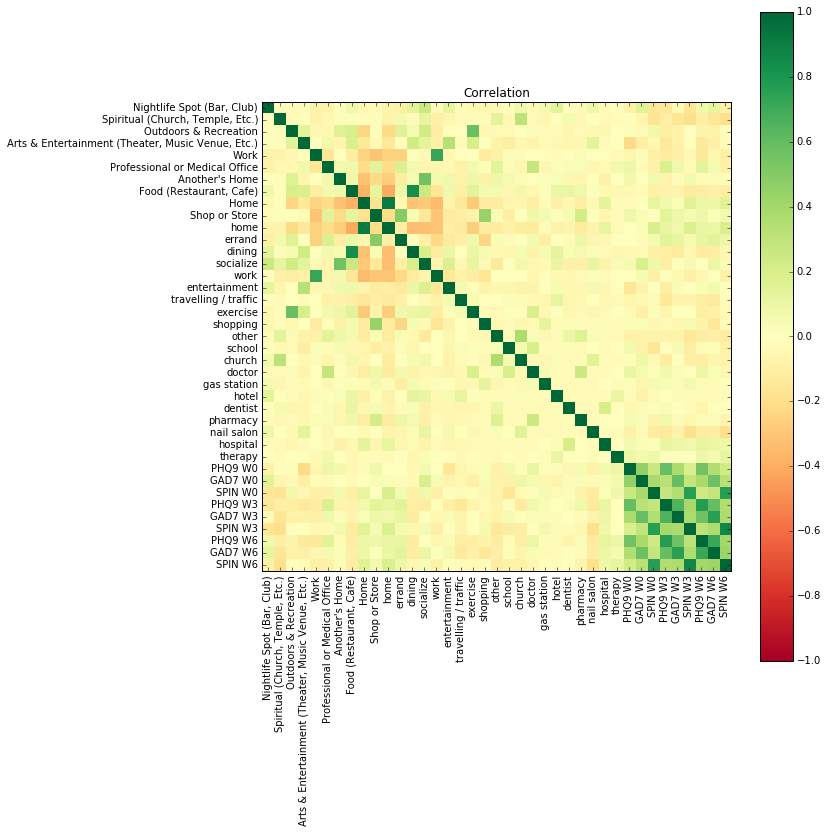

In [6]:
# showing the correlation matrix

data_fm = pd.concat([loc_freq, reason_freq, phq0, gad0, spin0, phq3, gad3, spin3, phq6, gad6, spin6], axis=1)

data_cov = calculate_covariance(data_fm.values.astype(float))

%matplotlib inline
plot_confusion_matrix(data_cov, labels=data_fm.columns)



In [33]:
fr = pd.DataFrame()
fr.loc[0,'a']=0
fr.loc[0,'c']=0
fr.loc[0,'d']=1
fr.loc[1,'d']=1
fr

,a,c,d
0,0.0,0.0,1.0
1,NaN,NaN,1.0
